0. Import bibliotek     

In [29]:
import os
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [30]:
print(*[file.split(".")[0] for file in os.listdir("opinions")], sep="\n")



12853297
134972232
141030806
151210226


In [31]:
product_id = 12853297
#product_id = input("podaj kod produktu: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions

,opinion_id,author,recommend,stars,content,cons,pros,opinion_date,purchase_date,up_vote,down_vote
0,4292582,Użytkownik Ceneo,Polecam,4.5,Tyle już pozytywnych opinii zostało napisanych...,[],[],2016-12-17 18:42:33,2016-12-06 20:31:50,0,0
1,18702281,l...9,Polecam,4.5,"bardzo dobre,ja te nozyki kupowala tez w Austr...",[],[],2024-06-03 14:38:37,2024-04-24 13:54:20,0,0
2,11341233,AGAB,Polecam,5.0,nawet po kilku latach wciąż jeden z najostrzej...,[],"[bardzo ostry, funkcjonalność, jakość, tani, w...",2019-11-28 21:51:45,2019-11-18 01:20:22,0,0
3,8723020,Rafał,Polecam,5.0,"świetny, ostry nóż, który bardzo długo taki po...",[],"[funkcjonalność, jakość, wygląd]",2018-12-12 14:38:20,2018-11-21 09:37:22,0,0
4,10796540,Marcin,Polecam,5.0,fajny mały pomocnik kuchenny,[],"[funkcjonalność, jakość, wygląd]",2019-07-17 13:39:52,2019-06-30 20:43:05,0,0
5,14494218,j...a,Polecam,5.0,"Super produkt, świetny kontakt ze sprzedawca, ...",[],"[bardzo ostry, funkcjonalność, jakość, wygląd]",2021-05-21 12:24:51,2021-05-19 11:26:08,0,0
6,11015931,Renata,Polecam,5.0,"Nóż ostry, rewelacja",[],"[bardzo ostry, funkcjonalność, jakość, rewelac...",2019-09-07 18:46:21,2019-08-28 10:49:49,0,0
7,6315469,jamm,Polecam,5.0,Wysoka jakość noża,[],"[funkcjonalność, jakość, wygląd]",2017-12-08 17:47:33,2017-12-05 12:22:23,0,0
8,18278137,d...n,Polecam,5.0,Świetny nóż 🔪 kuchenny. Rewelacyjny do krojeni...,[],[],2024-01-05 14:47:31,2024-01-02 19:29:17,0,0
9,11039275,Mikołaj,Polecam,5.0,Wszystko dobrze.,[],"[bardzo ostry, funkcjonalność, jakość, tani, w...",2019-09-13 15:30:50,2019-08-10 17:22:27,0,0


In [32]:
# opinions_count = len(opinions)
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars



4.884615384615385

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '43')]

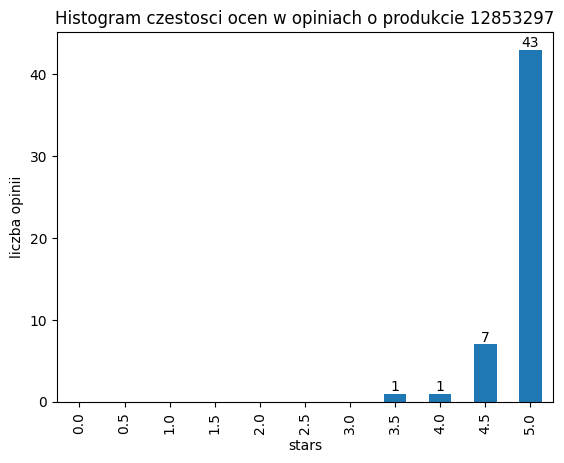

In [33]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5))
ax = stars_distribution.plot.bar(color = "skyblue")
ax.set_title(f'Histogram czestosci ocen w opiniach o produkcie {product_id}')
ax.set_xlabel(f"liczba gwiazdek")
ax.set_ylabel(f'liczba opinii')
ax = stars_distribution.plot.bar()
ax.bar_label(ax.containers[0], label_type = 'edge', fmt = lambda l: int(l) if l>0 else '')

Text(0.5, 1.0, 'udzial rekomendacji w opiniach o produkcie 12853297')

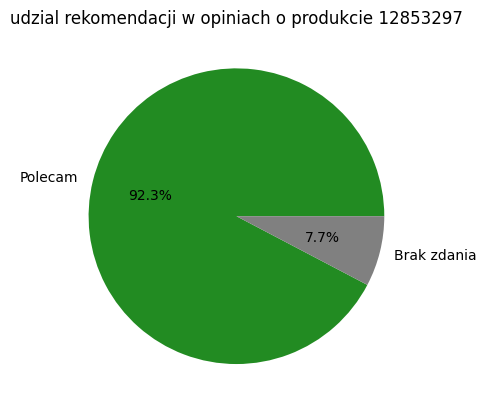

In [34]:
recommendations_distribution = opinions.recommend.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendations_distribution.plot.pie(
    autopct = lambda p: f'{p:.1f}%' if p > 0 else '',
    label = "", 
    colors = ['forestgreen', 'crimson', 'grey'],
    labels = ["Polecam", "Nie polecam", "Brak zdania"]
)
plt.title(f'udzial rekomendacji w opiniach o produkcie {product_id}')